<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana11/MediaMovil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import optimize
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [56]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/")
!ls

Parcial2    Semana1   Semana11	Semana3  Semana5  Semana7  Semana9
ProyectoML  Semana10  Semana2	Semana4  Semana6  Semana8


In [57]:
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana11/Data/MediaMovilData.csv'
file

'/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana11/Data/MediaMovilData.csv'

In [273]:
data = pd.read_csv(file)
data.head(10)
x = np.array(data['Ventas'],dtype=float)

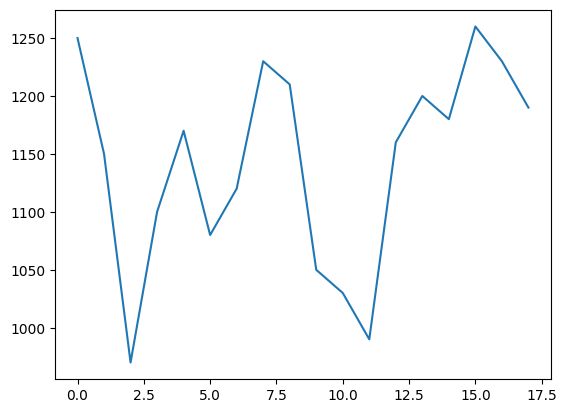

In [274]:
plt.plot(x)

In [275]:
def GetMediaMovil(x,n):

  media = np.zeros(len(x)+1)

  for i in range(len(media)):

    sum_ = 0.

   # print(i)
    if i >= n:

     ## print(i)
      for j in range(i-n,i):

        sum_ += x[j]

      media[i] = sum_/n

    else:

      media[i] = x[i]

  return media

In [276]:
media = GetMediaMovil(x,3)
#x

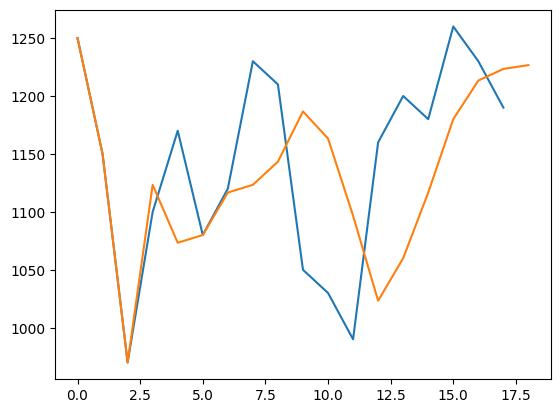

In [277]:
plt.plot(x)
plt.plot(media)

In [278]:
media[-1]

np.float64(1226.6666666666667)

In [279]:
def GetWeightedMediaMovil(x,w):

  n = len(w)

  media = np.zeros(len(x)+1)

  for i in range(len(media)):

    sum_ = 0

    if i >= n:

      k = 0
      for j in range(i-n,i):

        sum_ += w[k]*x[j]
        k += 1

      media[i] = sum_

    else:
      media[i] = x[i]

  return media

In [280]:
w = np.array([0.3,0.3,0.4])
Wmedia = GetWeightedMediaMovil(x,w)
Wmedia

array([1250., 1150.,  970., 1108., 1076., 1089., 1113., 1123., 1152.,
       1189., 1152., 1090., 1020., 1070., 1125., 1180., 1218., 1224.,
       1223.])

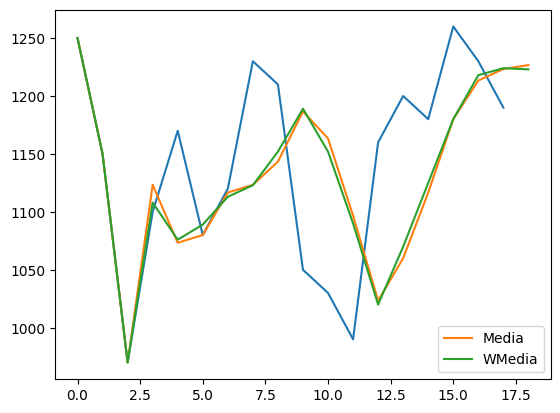

In [281]:
plt.plot(x)
plt.plot(media,label='Media')
plt.plot(Wmedia,label='WMedia')
plt.legend()

In [282]:
# Definamos la funcion de perdida
def GetError(x,y):
  error = np.abs(x-y)
  #print(error)
  return np.mean(error)

In [283]:
GetError(x,Wmedia[:-1])

np.float64(60.833333333333336)

In [284]:
def Cost(w):

  Wmedia = GetWeightedMediaMovil(x,w)
  Error = GetError(x,Wmedia[:-1])
  return Error

In [285]:
w0 = np.array([0.2,0.2,0.6])
Cost(w0)

np.float64(57.22222222222222)

In [286]:
w0 = np.array([0.3,0.3,0.4])
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) -1 } )
bounds = [(0.,1.) for _ in range(len(w0))]
result = optimize.minimize(Cost,w0,
                           options={"disp":True},
                           bounds = bounds,
                           constraints=constraints,
                           tol = 1e-5)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 54.51853949483699
            Iterations: 17
            Function evaluations: 94
            Gradient evaluations: 17


In [287]:
if result.success:
  wopt = result.x
  print(np.round(wopt,3),np.sum(wopt))
else:
  raise ValueError(result.message)

[0.133 0.    0.867] 1.0000000000194555


In [288]:
Cost(wopt)

np.float64(54.51853949483699)

In [289]:
optmean = GetWeightedMediaMovil(x,wopt)

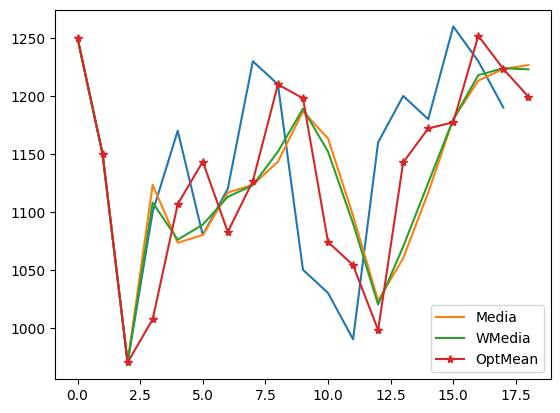

In [290]:
plt.plot(x)
plt.plot(media,label='Media')
plt.plot(Wmedia,label='WMedia')
plt.plot(optmean,marker='*',label='OptMean')
plt.legend()